In [35]:
import numpy as np
import sympy as sy

import matplotlib.pyplot as plt


import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app


plt.style.use("ggplot")

In [ ]:
for ii in range(mm.Platform.getNumPlatforms()):
    print(mm.Platform.getPlatform(ii).getName())

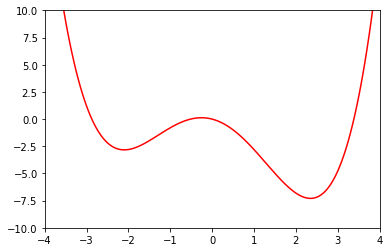

In [34]:
def double_well(x,Eo,C,m):
    return Eo*(C*x**4-x**2)+m*x

Eo=2.0
C=0.1
m=-1.0

x_serie = np.arange(-5., 5., 0.05)

plt.plot(x_serie, double_well(x_serie,Eo,C,m), 'r-')
plt.ylim(-10,10)
plt.xlim(-4,4)
plt.show()

In [39]:
x, Eo, C, m = sy.symbols('x Eo C m')
g=sy.diff(Eo*(C*x**4-x**2)+m*x,x)

In [44]:
sy.polys.polytools.poly_from_expr(g,gen=x)

(Poly(4*x**3*C*Eo - 2*x*Eo + m, x, m, C, Eo, domain='ZZ'),
 {'domain': ZZ, 'gen': x, 'gens': (x, m, C, Eo), 'polys': False})

In [1]:
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
temperature = 300*unit.kelvin
friction    = 1/unit.picosecond


Eo = Eo * unit.kilocalories_per_mole/unit.angstrom**2
C  = C  * 1/unit.angstrom**2
mass = 1.0 * unit.amu 
num_degrees_of_freedom = 1

In [2]:
step_size       = 0.001*unit.picoseconds
num_steps       = 30000
saving_period   = 100
platform_name='CPU'  #platform:     A platform (CPU, OpenCL, CUDA, or reference); default is platform=OpenCL"

initial_positions = unit.Quantity(np.zeros([1,3], np.float32), unit.angstroms)

"""
T = sqrt(m/K)
timestep smaller than ~ T/10
standard deviation in each dimension sigma= (kT / K)^(1/2)
Expectation and standard deviation of the potential energy of a 3D harmonic oscillator is (3/2)kT
"""

In [4]:
num_checks     = int(num_steps/saving_period)
times      = unit.Quantity(np.zeros([num_checks], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_checks,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_checks,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_checks], np.float32), unit.kilocalories_per_mole)
kinetic_energies     = unit.Quantity(np.zeros([num_checks], np.float32), unit.kilocalories_per_mole)

In [6]:
system = mm.System()
system.addParticle(mass)

if num_degrees_of_freedom==1:
    force = mm.CustomExternalForce('(K/2.0) * (x^2)')
elif num_degrees_of_freedom==2:
    force = mm.CustomExternalForce('(K/2.0) * (x^2 + y^2)')
elif num_degrees_of_freedom==3:
    force = mm.CustomExternalForce('(K/2.0) * (x^2 + y^2 + z^2)')

In [7]:
force.addGlobalParameter('K', K)
force.addParticle(0, [])
system.addForce(force)

0

In [10]:
integrator = mm.LangevinIntegrator(temperature, friction, step_size)
platform = mm.Platform.getPlatformByName(platform_name)


In [11]:
context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

In [19]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [32]:
for ii in range(num_checks):

    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()



In [34]:
times

Quantity(value=30.40000000001417, unit=picosecond)

In [35]:
positions


Quantity(value=array([[ 7.76931420e-02, -5.17250204e+00,  4.62114429e+00],
       [ 2.48776898e-02, -6.22669601e+00,  4.97464037e+00],
       [-4.91157994e-02, -7.32402563e+00,  5.43776035e+00],
       [-6.22850060e-02, -8.14398193e+00,  6.00616741e+00],
       [ 1.50428116e-02, -8.81696606e+00,  6.47495794e+00],
       [ 7.47299045e-02, -9.41902065e+00,  6.62778950e+00],
       [ 5.01183933e-03, -9.72089958e+00,  6.75295115e+00],
       [-1.59849301e-02, -9.80257797e+00,  6.86652279e+00],
       [-7.18687847e-03, -9.76660156e+00,  6.78588676e+00],
       [-9.28779393e-02, -9.66847897e+00,  6.75353098e+00],
       [ 1.96788888e-02, -9.24080181e+00,  7.08967352e+00],
       [ 6.61048591e-02, -8.61558723e+00,  7.79316568e+00],
       [ 2.28916202e-03, -8.25114059e+00,  7.90612459e+00],
       [-8.07682052e-02, -8.24750328e+00,  8.03706455e+00],
       [-2.24252995e-02, -8.38317966e+00,  8.29456234e+00],
       [ 5.90858497e-02, -8.42976952e+00,  8.59482002e+00],
       [ 1.79755986e-02, 

In [36]:
velocities

Quantity(value=array([[ 4.24837542e+00, -9.46125221e+00,  5.15583563e+00],
       [-2.82627749e+00, -9.41226482e+00,  3.83253765e+00],
       [-1.56679869e+00, -1.06505213e+01,  7.26781559e+00],
       [ 2.92848539e+00, -5.55044556e+00,  7.88527155e+00],
       [ 6.50170660e+00, -8.01309109e+00,  1.93597579e+00],
       [-1.93659616e+00, -3.75987792e+00,  1.27962589e+00],
       [-4.04439783e+00, -1.76823711e+00,  1.90705433e-01],
       [-2.40154433e+00, -1.26845658e+00,  1.19362104e+00],
       [-2.27719665e+00,  7.85170794e-01, -2.59808493e+00],
       [-2.46662542e-01,  2.57379842e+00,  3.12859631e+00],
       [ 3.87697935e+00,  4.81332302e+00,  6.25901651e+00],
       [ 1.42250824e+00,  4.98767900e+00,  6.30740023e+00],
       [-5.96173429e+00,  1.69756377e+00,  8.95882308e-01],
       [-1.23020422e+00, -1.44684803e+00,  1.40135002e+00],
       [ 6.64792681e+00, -1.05628204e+00,  3.02201962e+00],
       [-2.09231675e-01,  4.63735223e-01,  5.13806391e+00],
       [-5.89472866e+00, 

In [37]:
kinetic_energies

Quantity(value=array([1.08371270e+00, 9.15747046e-01, 1.37944508e+00, 8.42029274e-01,
       8.98809135e-01, 1.67727098e-01, 1.61045060e-01, 7.02531487e-02,
       1.02090321e-01, 1.34563759e-01, 6.30542219e-01, 5.42315841e-01,
       3.22268903e-01, 4.11975682e-02, 4.53827173e-01, 2.19435260e-01,
       3.92335057e-01, 8.76405388e-02, 1.13127351e-01, 3.98217559e-01,
       5.72793484e-01, 6.02214873e-01, 5.20477176e-01, 3.05589736e-01,
       5.08760035e-01, 3.08401257e-01, 4.15093035e-01, 1.19518586e-01,
       3.53374392e-01, 1.61629230e-01, 4.06661391e-01, 5.63470006e-01,
       8.07417512e-01, 9.62441921e-01, 1.18423092e+00, 6.68965101e-01,
       3.00885290e-01, 3.76756072e-01, 2.08705112e-01, 2.17368260e-01,
       3.83363277e-01, 7.05326080e-01, 9.00415599e-01, 6.57473207e-01,
       1.37383568e+00, 1.00133359e+00, 5.58693349e-01, 2.79921830e-01,
       6.41713977e-01, 6.23574317e-01, 4.21665519e-01, 4.20862705e-01,
       1.15353990e+00, 3.77777547e-01, 6.55159712e-01, 1.72671

In [38]:
potential_energies

Quantity(value=array([3.01811218e-01, 3.09449732e-02, 1.20618083e-01, 1.93971112e-01,
       1.13143083e-02, 2.79227912e-01, 1.25592679e-03, 1.27758989e-02,
       2.58256122e-03, 4.31315571e-01, 1.93629358e-02, 2.18492612e-01,
       2.62013142e-04, 3.26175153e-01, 2.51447018e-02, 1.74556881e-01,
       1.61561072e-02, 9.59352925e-02, 7.33982772e-04, 1.14642153e-03,
       2.64455993e-02, 5.40619344e-03, 2.07221159e-03, 2.02077348e-02,
       1.56331006e-02, 2.14619994e-01, 5.63129075e-02, 3.61552566e-01,
       3.78454924e-01, 1.93255439e-01, 3.00202481e-02, 2.50637643e-02,
       3.77450213e-02, 1.32374205e-02, 1.64710041e-02, 1.64258316e-01,
       1.93528444e-01, 1.59267843e-01, 9.81128141e-02, 7.77994767e-02,
       2.48181313e-01, 1.18255198e-01, 3.30736041e-02, 1.21268518e-01,
       3.87101956e-02, 1.27948910e-01, 1.35477749e-04, 1.57055666e-03,
       1.29995700e-02, 2.92208372e-03, 1.71897791e-05, 1.27599373e-01,
       2.14558989e-02, 4.26646978e-01, 4.56867665e-02, 4.44611